<a href="https://colab.research.google.com/github/alexanderdvm/alexanderdvm/blob/main/Proyecto_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 4**: Luis Camilo Torres, Alejandro Lopez, Jhonatan Chasoy, Andrea Ahumada y Alexander Velasquez.

#Introduccion y Descripcion del proyecto
<img src="https://content.instructables.com/FHK/B8DU/L6NML5UD/FHKB8DUL6NML5UD.jpg?auto=webp&frame=1&fit=bounds&md=43b8f104c29a919e48d337375126ae74" width="300" height="200">


**Control de estabilidad de Balanza**

 Sistema de balance de estabilidad para una bolita en una barra que se inclina. Emplea un controlador PID para mantener la bolita en equilibrio, este controlador PID ajusta continuamente la posición de la base de la barra en función de la posición y la velocidad de la bolita, así como de la inclinación de la barra. Utiliza una combinación de proporcionalidad, integralidad y derivación para calcular la señal de control necesaria para contrarrestar las perturbaciones y mantener el sistema estable.


*Materiales:*
1. Servomotor (Futaba s3003)
2. Sensor infrarojo (sharp 2ya021)
3. Arduino (Arduino uno)
4. Estructura de madera
5. Soportes
6. Capacitor
7. Bateria
8. Bola ping pong




# Objetivos

**General**
Desarrollar y diseñar un sistema de control para el balance de estabilidad de una bolita en una barra utilizando la teoría de control.

**Especificos:**
- Modelar la función de transferencia de la planta de manera analítica.
- Montar el modelo físico del sistema.
- Hacer pruebas para validar el modelo analítico.
- Diseñar el controlador requerido que haga el error en estado estacionario nulo.

**Cumplimiento de objetivos**

General (100%)

Especificos:
- Modelar la función de transferencia de la planta de manera analítica. (100%)
- Montar el modelo físico del sistema. (100%)
- Hacer pruebas para validar el modelo analítico. (100%)
- Diseñar el controlador requerido que haga el error en estado estacionario nulo. (100%)

# Actividades para cumplir con los objetivos

1. modelar sistema.
2. modelar controlador con variables modificables.
3. Implementar posibles perturbaciones.
4. definir piezas: diametros y material.
5. definir lugar de impresion 3D.
6. Cotización final
7. Realizar pruebas sobre el diseño final.



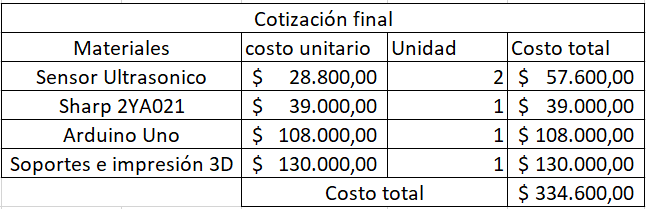

NOTA: El resto de materiales cuyo precio no se encuentra consignado en la cotización fueron materiales aportados por el grupo pues ya se tenian en disposición.

DIAGRAMA DE BLOQUE


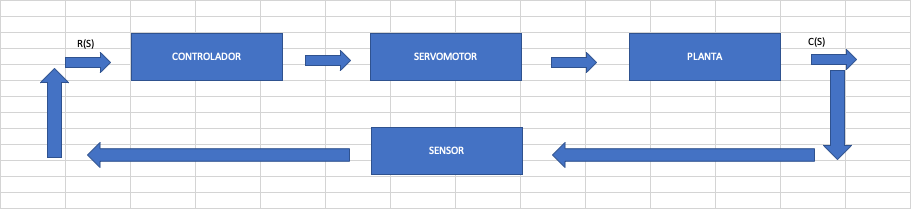





#Modelado del sistema

Proceso matematico

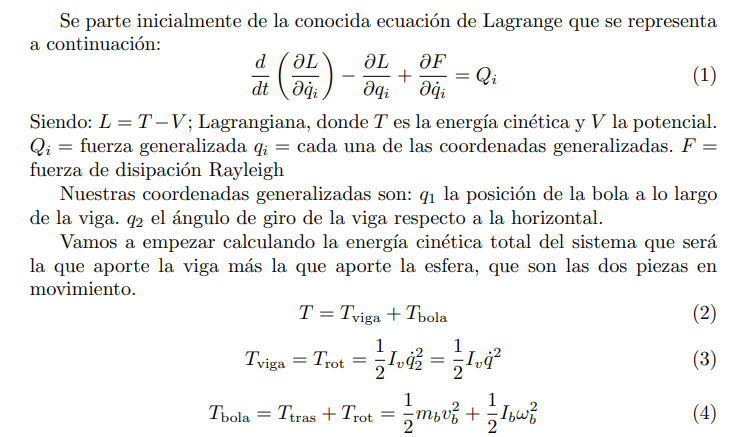

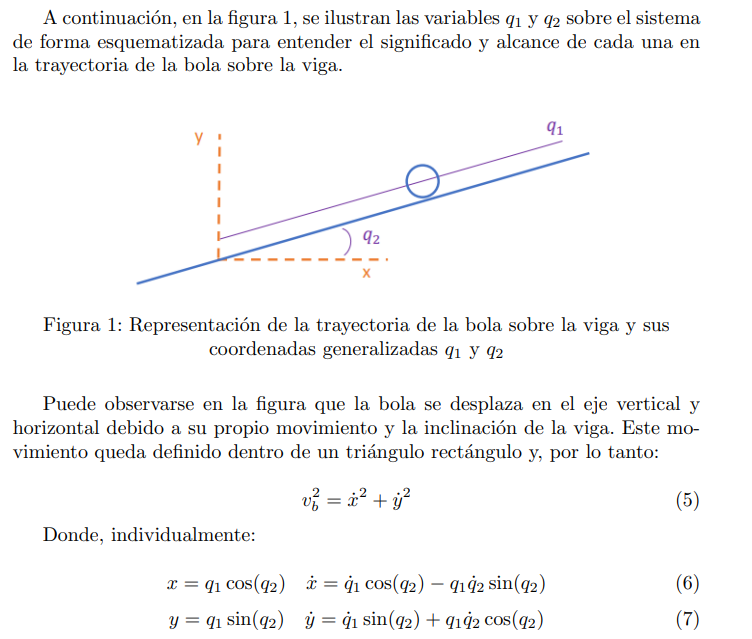

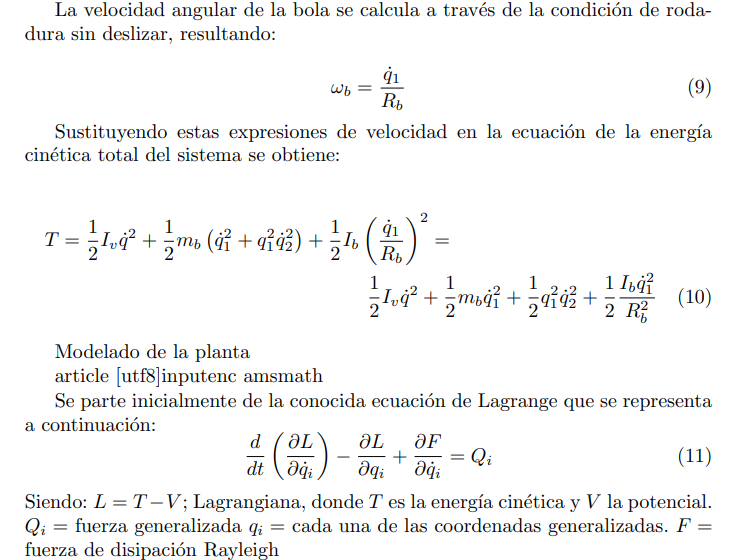
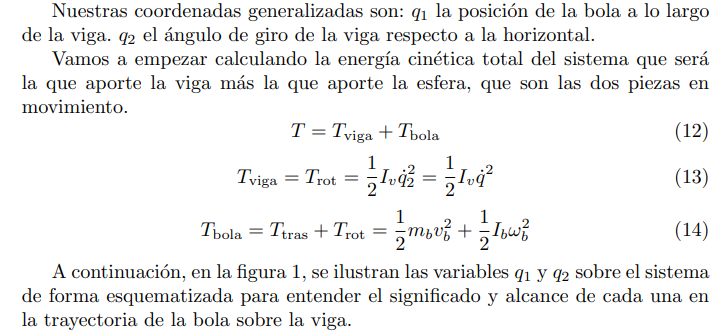
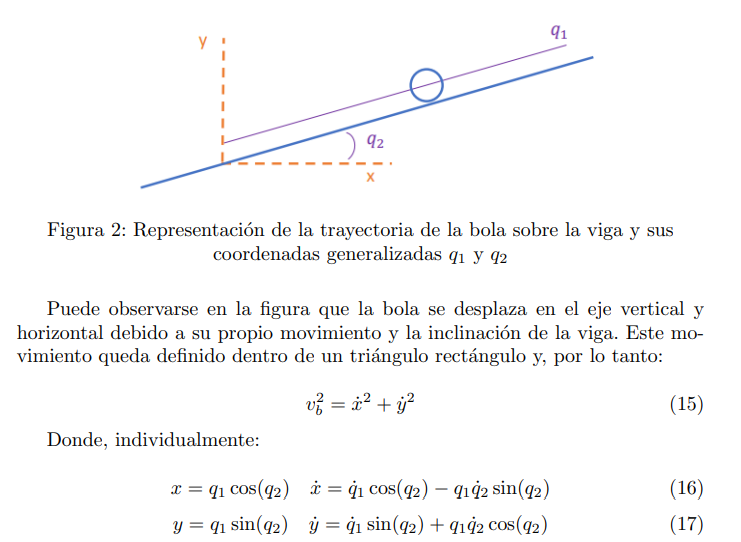

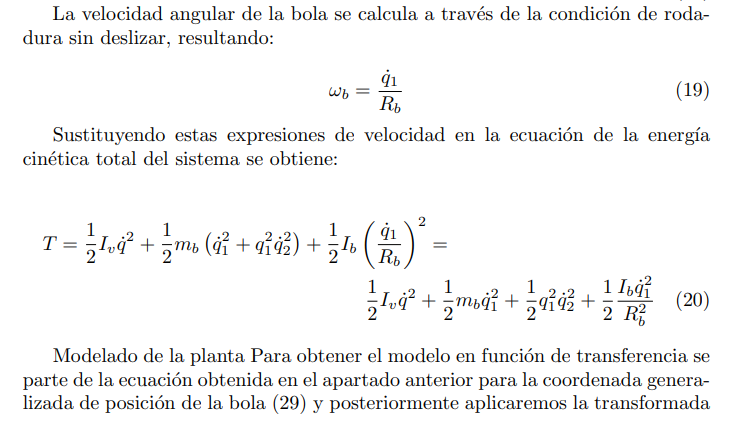
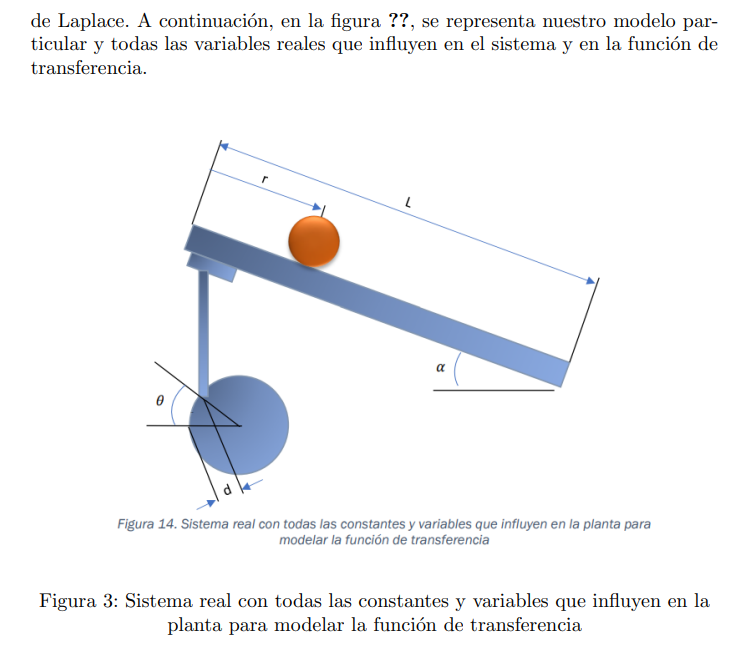
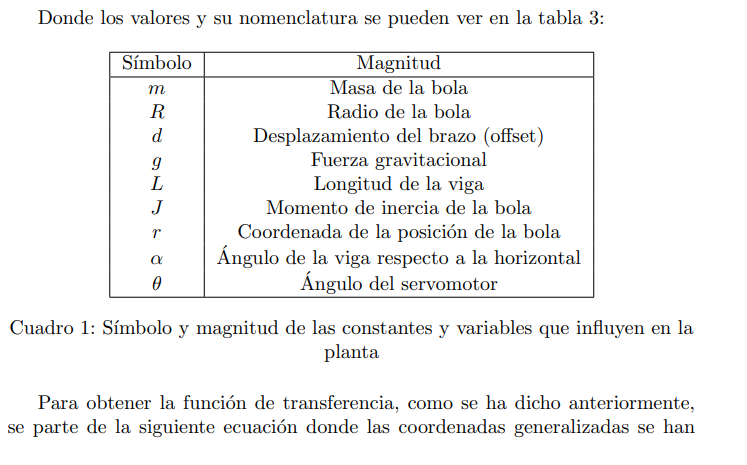

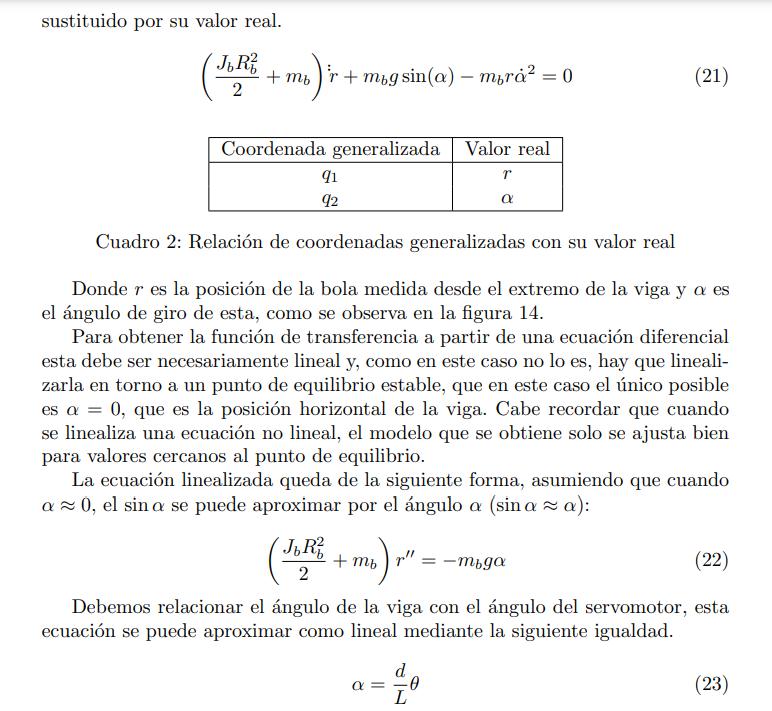

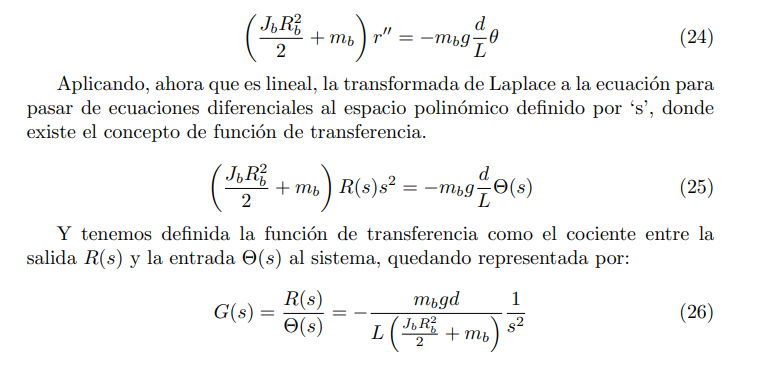

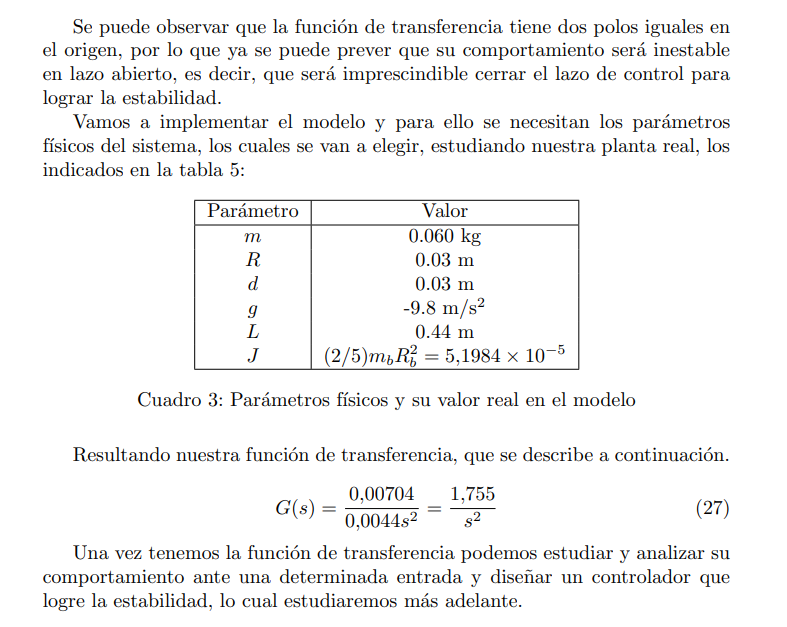

#Lazo abierto

G1 <TransferFunction>: sys[73]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[74]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1
-
1

Lazo abierto= <TransferFunction>: sys[73]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[77]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.75
----------
s^2 + 1.75



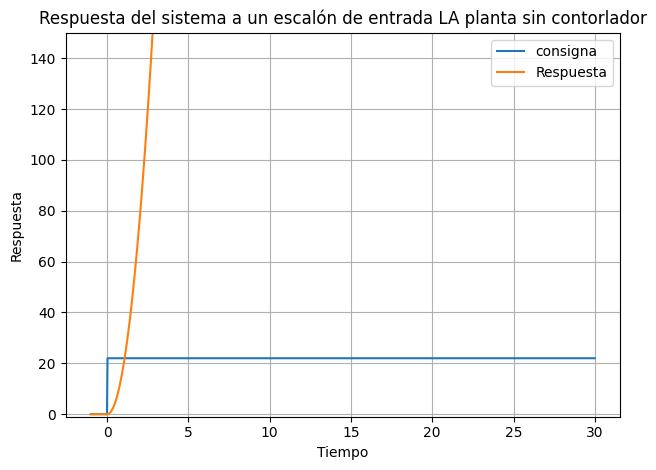

[[list([<matplotlib.lines.Line2D object at 0x7b40242c0940>]) list([])
  list([<matplotlib.lines.Line2D object at 0x7b40242c0c40>, <matplotlib.lines.Line2D object at 0x7b40242c0ee0>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7b402431b130>])],
       [list([<matplotlib.lines.Line2D object at 0x7b402431b3a0>])]],
      dtype=object)

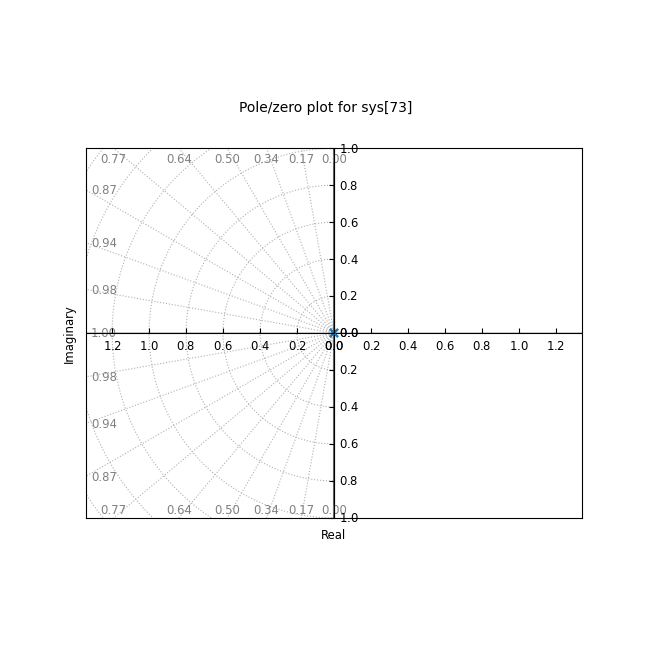

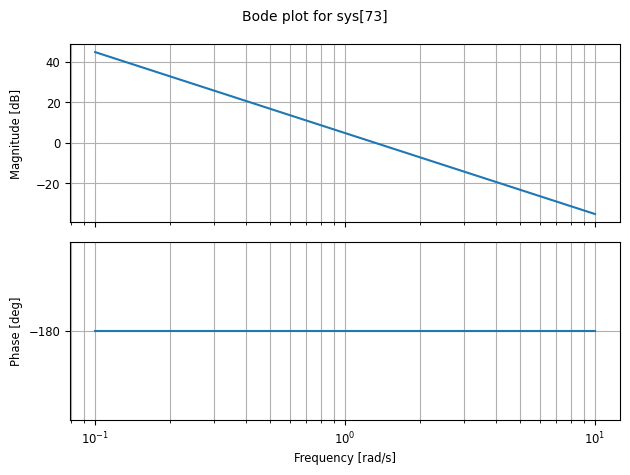

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[1]
dencontrol=[1]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)

# Respuesta del sistema a un escalón de entrada en lazo abierto
t, respuesta = ct.forced_response(G1, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(1, 1, 1)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LA planta sin contorlador')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.ylim(-1, 150)
plt.grid(True)
plt.legend()


# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G1))

ct.bode(G1,dB=True)



En esta prueba sobre el modelo podemos observar que la posicion de la bolita tendera a infinito, sin embargo se espera que en la prueba sobre la planta real la posicion de la bolita llegue al maximo de la barra, y al encontrarse con la barrera al final, se mantenga constante en este valor.

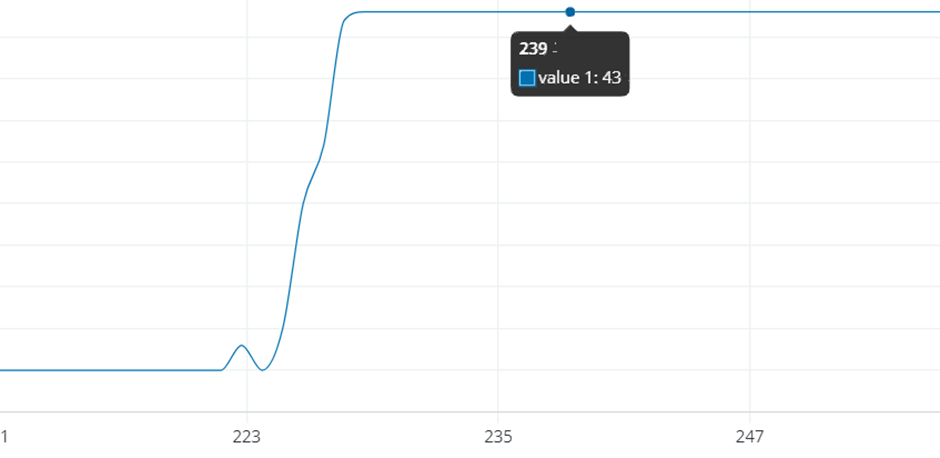

#Prueba lazo cerrado sin controlador

G1 <TransferFunction>: sys[90]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[91]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1
-
1

Lazo abierto= <TransferFunction>: sys[90]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[94]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.75
----------
s^2 + 1.75



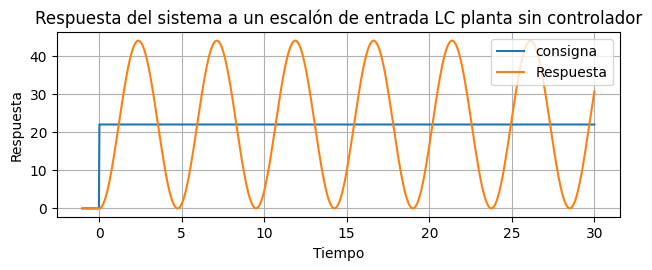

[[list([<matplotlib.lines.Line2D object at 0x7b4023f1e890>]) list([])
  list([<matplotlib.lines.Line2D object at 0x7b4023f1ef20>, <matplotlib.lines.Line2D object at 0x7b4023f1ea40>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7b4023f96170>])],
       [list([<matplotlib.lines.Line2D object at 0x7b4023f95270>])]],
      dtype=object)

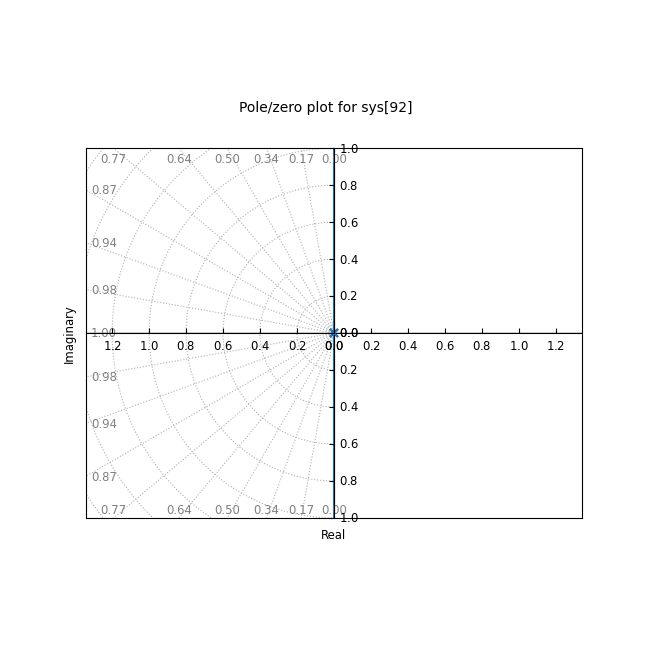

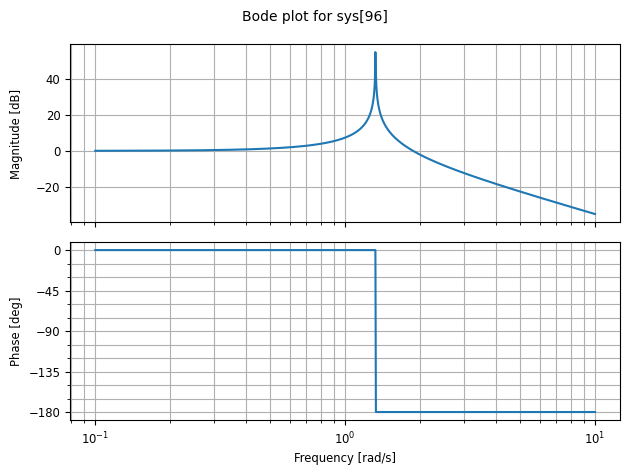

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[1]
dencontrol=[1]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)



# Respuesta del sistema a un escalón de entrada en lazo cerrado
closeloop = ct.feedback(G1, 1)
t, respuesta = ct.forced_response(closeloop, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(2, 1, 2)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LC planta sin controlador')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()




# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G_serie))

ct.bode(closeloop,dB=True)




#Respuesta experimental del sistema

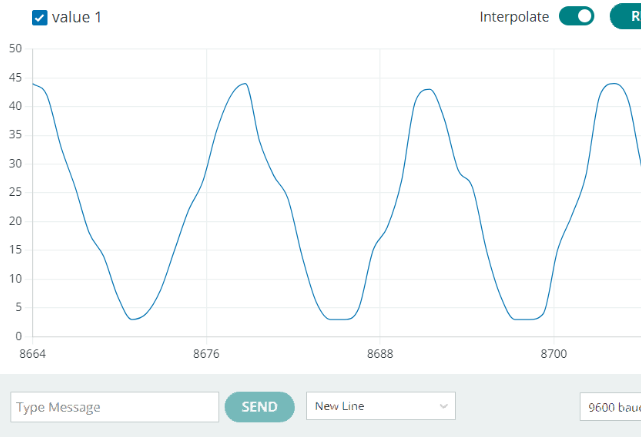

#Diseño del controlador
Utilizando el metodo de asignación de polos.

(1) se generan las ecuaciones iniciales.
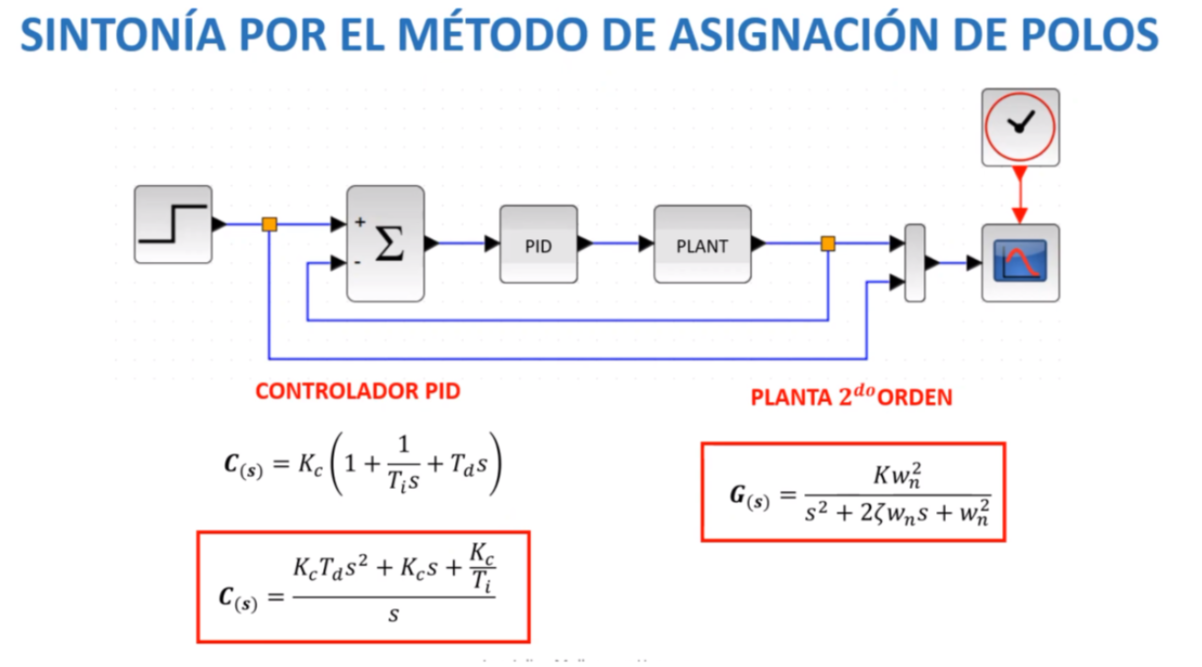

(2)


Luego se diseñan las nuevas ecuaciones caracteristicas con ess

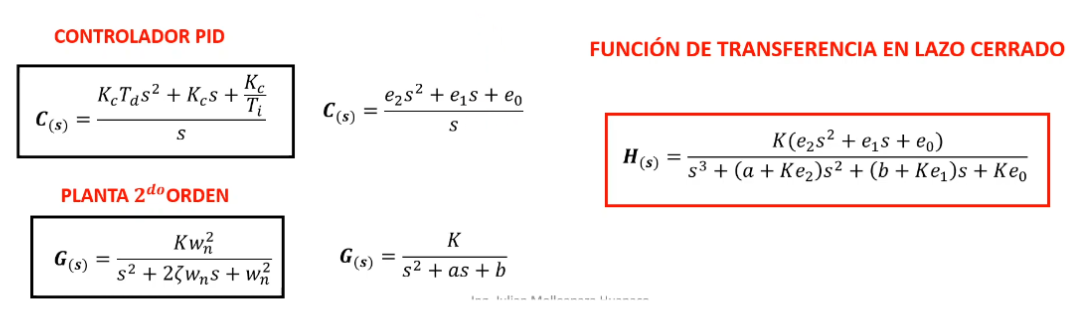



(3)
Definimos los parametros de diseño asignando el polo adicional.

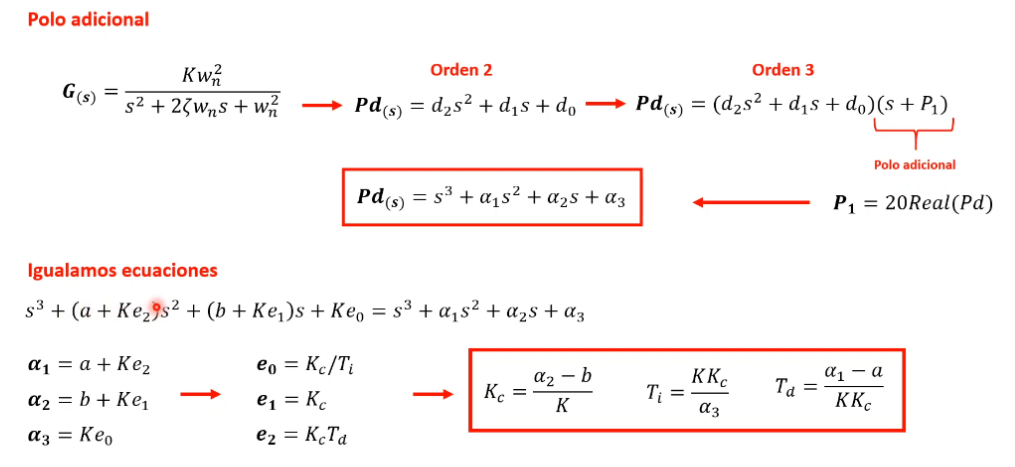

(4)
Se plantean las ecuaciones finales.

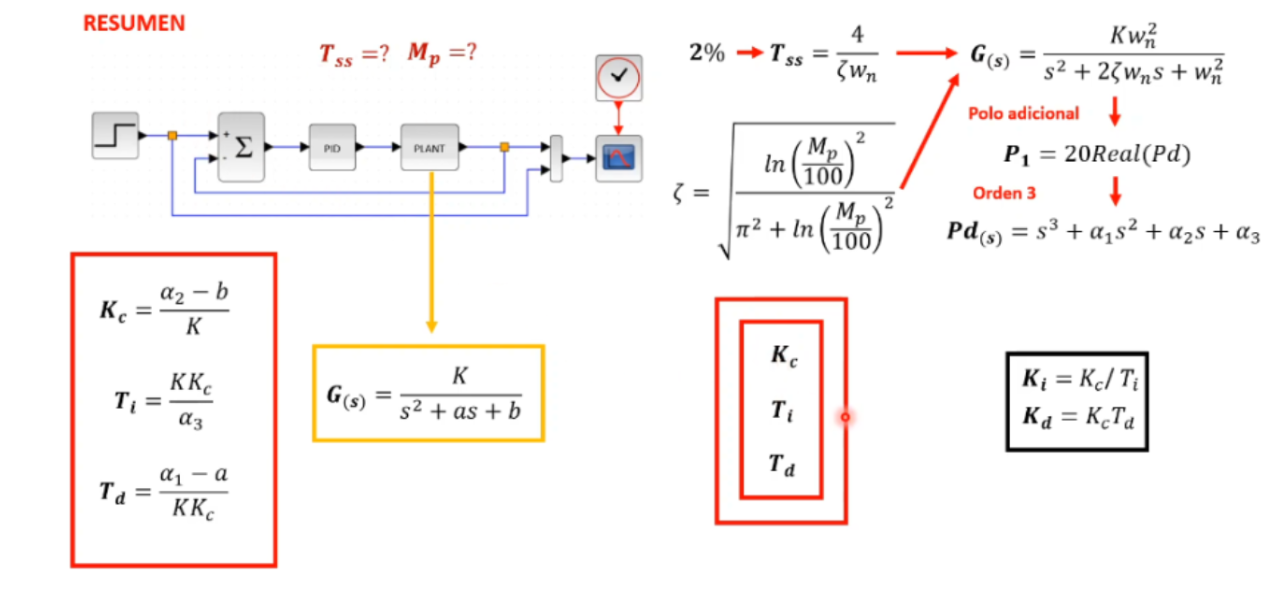


con los valores realaes de la planta en lazo cerrado y sympy se diseño la solucion del sistema de ecuaciones para determianar las constantes

In [ ]:
import sympy as sp

# Definir los símbolos
wn, s, j = sp.symbols('wn s j')

# Definir la ecuación
ecuacion = wn**2 / (s**2 + 2 * j * wn + wn**2) - 1.75 / (1.75 + s**2)

# Resolver la ecuación
solucion = sp.linsolve([ecuacion], (wn, j))

# Mostrar la solución
solucion


NonlinearError: nonlinear term: wn**2

#sistema con controlador Proporcional


G1 <TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[36]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.3
---
 1

Lazo abierto= <TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[39]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.275
-----------
s^2 + 2.275



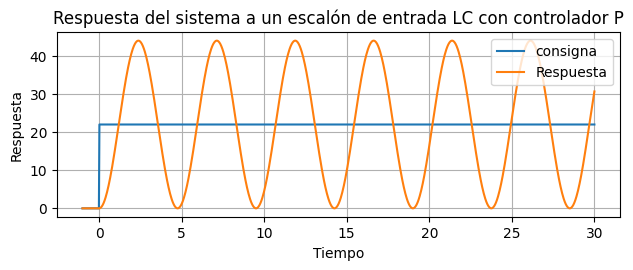

[[list([<matplotlib.lines.Line2D object at 0x7bffccb7ac80>]) list([])
  list([<matplotlib.lines.Line2D object at 0x7bffccb7afb0>, <matplotlib.lines.Line2D object at 0x7bffccb7ae60>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7bffcc9cf430>])],
       [list([<matplotlib.lines.Line2D object at 0x7bffcc9cf6a0>])]],
      dtype=object)

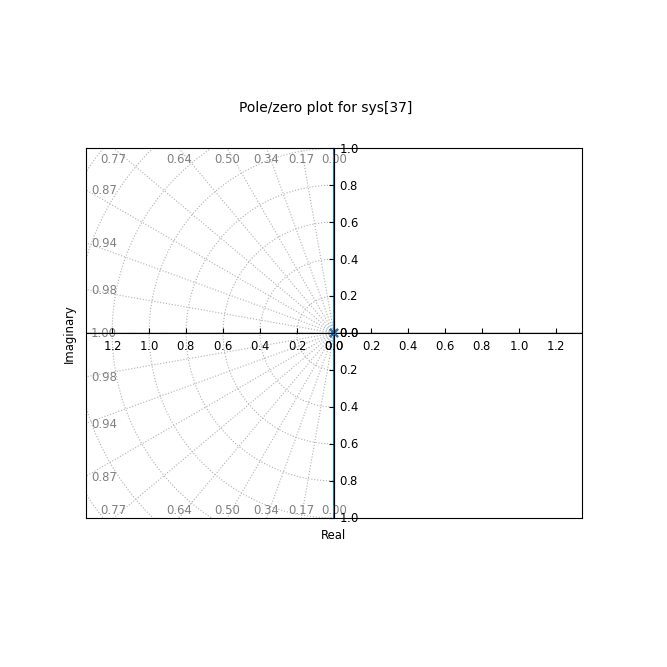

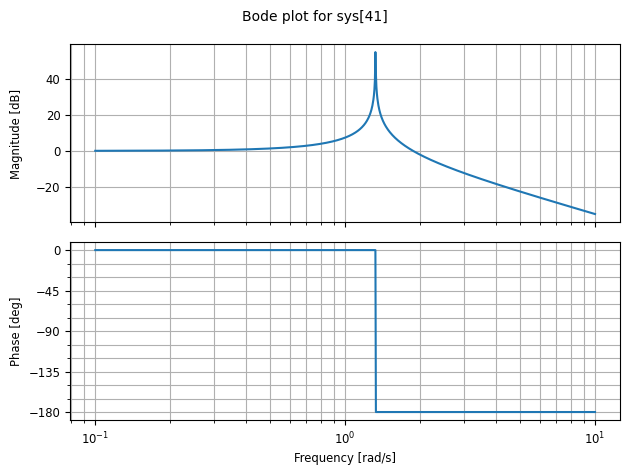

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[1.3]
dencontrol=[1]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)



# Respuesta del sistema a un escalón de entrada en lazo cerrado
closeloop = ct.feedback(G1, 1)
t, respuesta = ct.forced_response(closeloop, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(2, 1, 2)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LC con controlador P')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()




# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G_serie))

ct.bode(closeloop,dB=True)


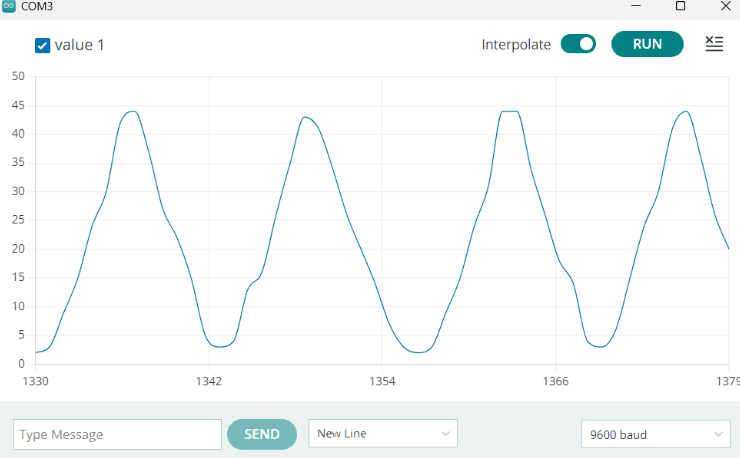

# Sistema con controlador Proporcional-Derivativo

G1 <TransferFunction>: sys[89]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[90]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.6 s^2 + 1.3 s
---------------
       s

Lazo abierto= <TransferFunction>: sys[89]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[93]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.05 s^2 + 2.275 s
------------------------
s^3 + 1.05 s^2 + 2.275 s



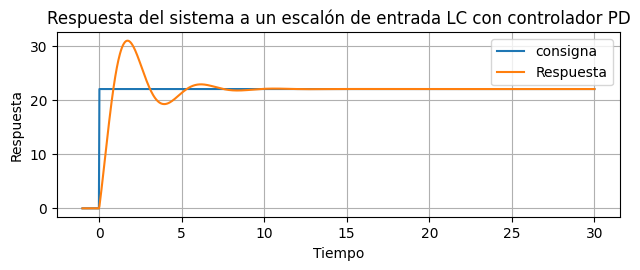

[[list([<matplotlib.lines.Line2D object at 0x7bffcbd60460>])
  list([<matplotlib.lines.Line2D object at 0x7bffcbd4e200>])
  list([<matplotlib.lines.Line2D object at 0x7bffcbd4eef0>, <matplotlib.lines.Line2D object at 0x7bffcbd4c040>, <matplotlib.lines.Line2D object at 0x7bffcbd4fb50>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7bffcbd82800>])],
       [list([<matplotlib.lines.Line2D object at 0x7bffcbd81fc0>])]],
      dtype=object)

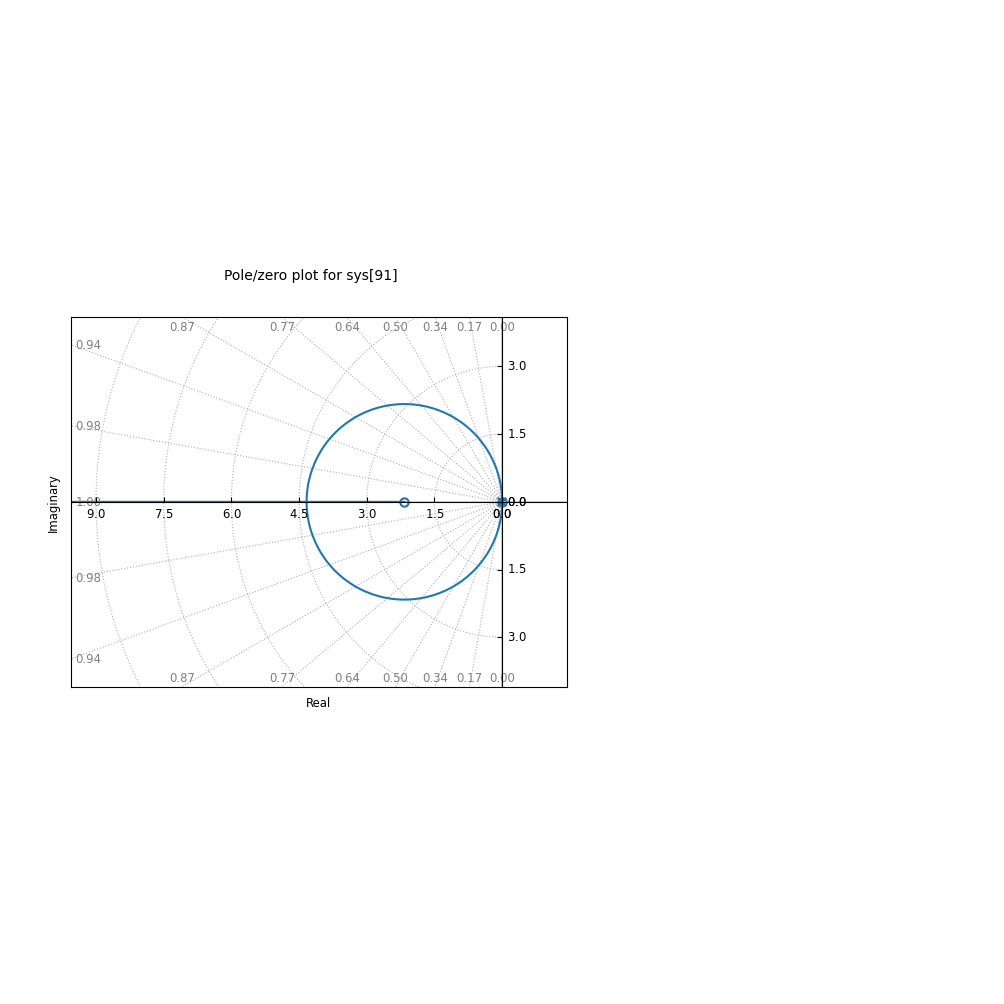

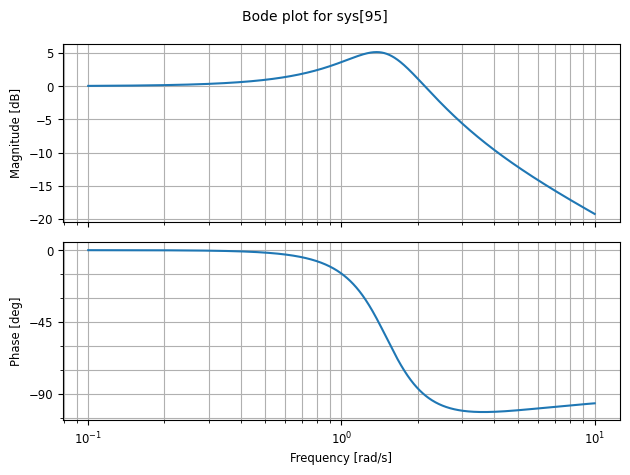

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[0.6,1.3,0]
dencontrol=[0,1,0]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)



# Respuesta del sistema a un escalón de entrada en lazo cerrado
closeloop = ct.feedback(G_serie, 1)
t, respuesta = ct.forced_response(closeloop, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(2, 1, 2)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LC con controlador PD')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()




# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G_serie))

ct.bode(closeloop,dB=True)

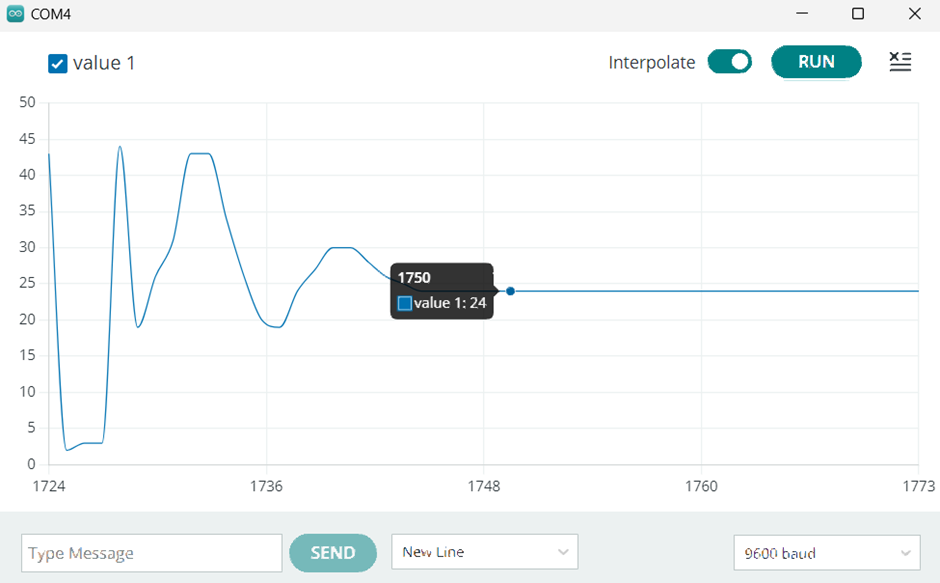

# Sistema con controlador Proporcional-Integral

G1 <TransferFunction>: sys[107]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[108]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.3 s + 0.08
------------
     s

Lazo abierto= <TransferFunction>: sys[107]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[111]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.275 s + 0.14
--------------------
s^3 + 2.275 s + 0.14



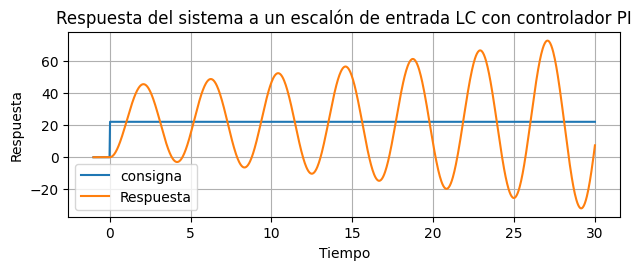

[[list([<matplotlib.lines.Line2D object at 0x7bffcb601360>])
  list([<matplotlib.lines.Line2D object at 0x7bffcb601630>])
  list([<matplotlib.lines.Line2D object at 0x7bffcb601900>, <matplotlib.lines.Line2D object at 0x7bffcb601ba0>, <matplotlib.lines.Line2D object at 0x7bffcb601e40>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7bffcb65feb0>])],
       [list([<matplotlib.lines.Line2D object at 0x7bffcb498160>])]],
      dtype=object)

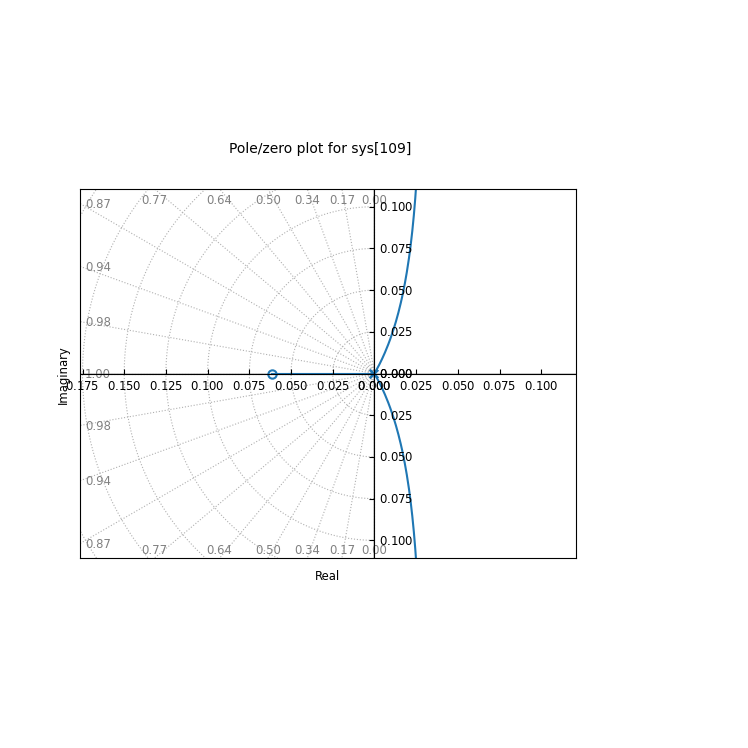

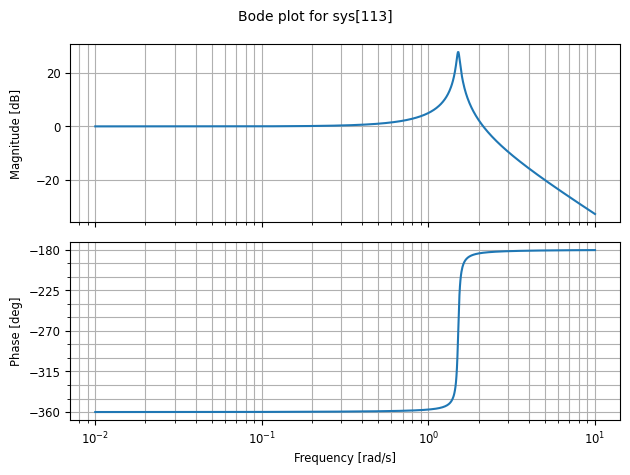

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[0,1.3,0.08]
dencontrol=[0,1,0]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)



# Respuesta del sistema a un escalón de entrada en lazo cerrado
closeloop = ct.feedback(G_serie, 1)
t, respuesta = ct.forced_response(closeloop, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(2, 1, 2)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LC con controlador PI')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()




# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G_serie))

ct.bode(closeloop,dB=True)

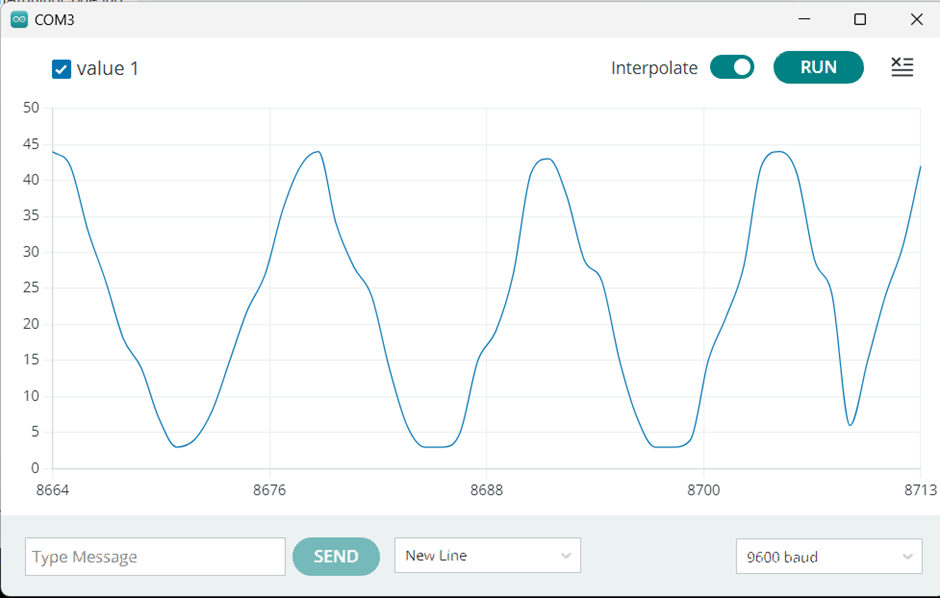

# Sistema con controlador Proporcional-Derivativo-Integral

G1 <TransferFunction>: sys[125]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

controlador= <TransferFunction>: sys[126]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.6 s^2 + 1.3 s + 0.08
----------------------
          s

Lazo abierto= <TransferFunction>: sys[125]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.75
----
s^2

Lazo cerrado= <TransferFunction>: sys[129]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   1.05 s^2 + 2.275 s + 0.14
-------------------------------
s^3 + 1.05 s^2 + 2.275 s + 0.14



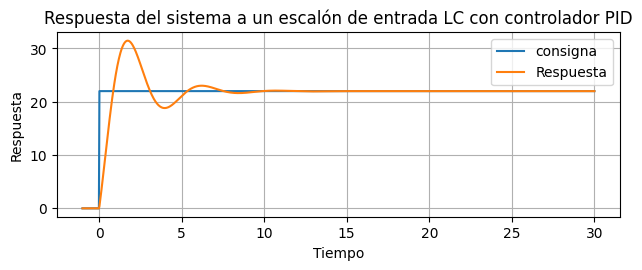

[[list([<matplotlib.lines.Line2D object at 0x7bffcb267970>])
  list([<matplotlib.lines.Line2D object at 0x7bffcb266c80>])
  list([<matplotlib.lines.Line2D object at 0x7bffcb267070>, <matplotlib.lines.Line2D object at 0x7bffcb266d40>, <matplotlib.lines.Line2D object at 0x7bffcb266470>])]]


array([[list([<matplotlib.lines.Line2D object at 0x7bffcb0fc970>])],
       [list([<matplotlib.lines.Line2D object at 0x7bffcb257ac0>])]],
      dtype=object)

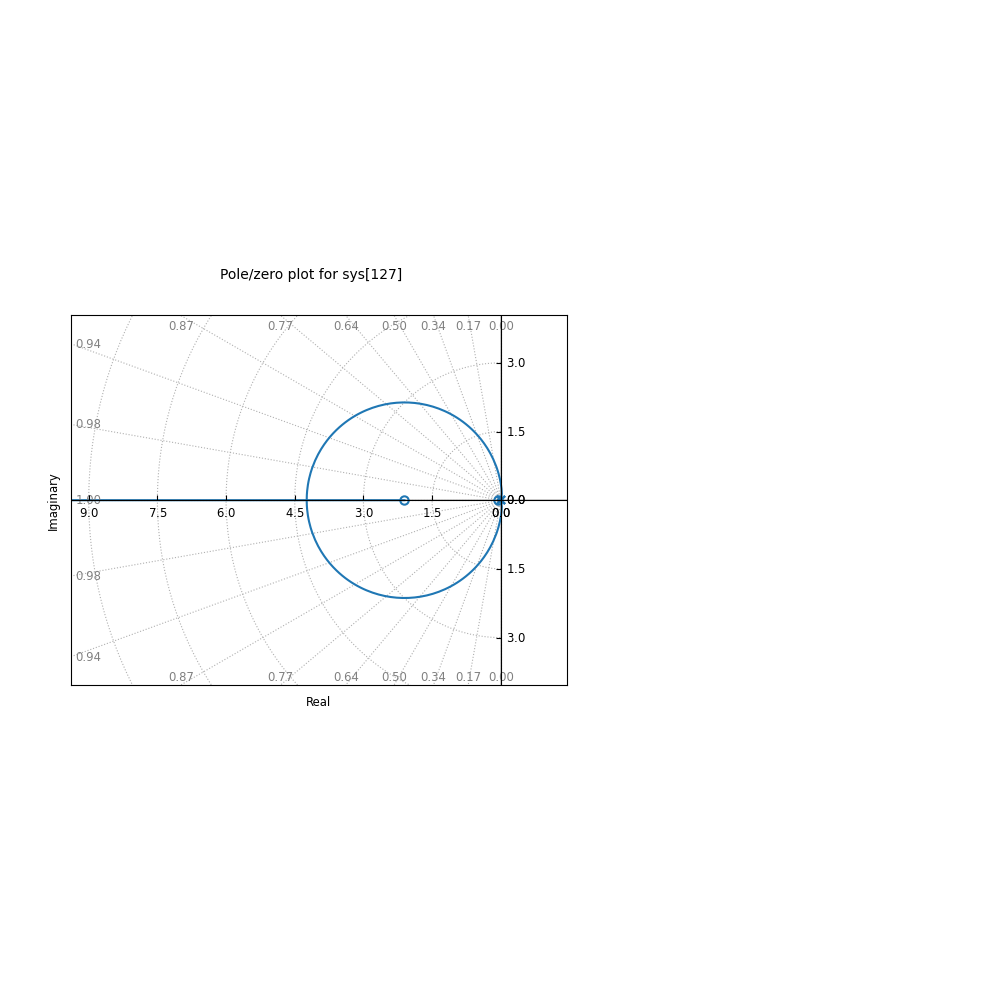

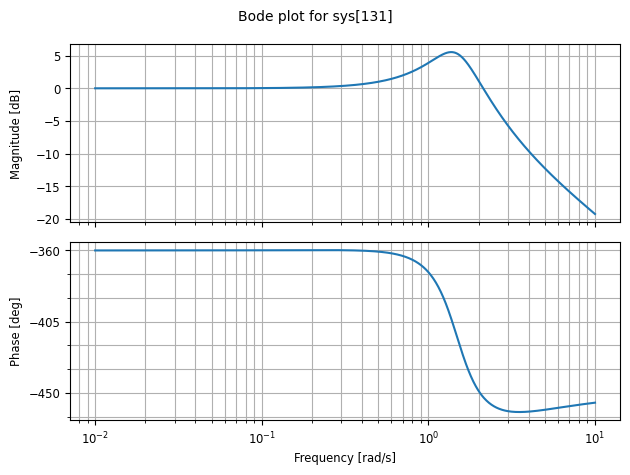

In [ ]:
#!pip install control
import matplotlib.pyplot as plt

import control as ct
import numpy as np

#Definir la funcion de transferencia de la planta

Numplanta=1.75
Denplanta=[1,0,0]
G1=ct.TransferFunction(Numplanta,Denplanta)
print("G1",G1)



#Controlador PID
numcontrol=[0.6,1.3,0.08]
dencontrol=[0,1,0]
PID=ct.TransferFunction(numcontrol,dencontrol)


#cerrar lazo
G_serie= ct.series(PID,G1)
closeloop= ct.feedback(G_serie,1)



print(f"controlador= {PID}")
print(f"Lazo abierto= {G1}")
print(f"Lazo cerrado= {closeloop}")


# Gráficas originales
def escalonu(t):
    return 22 * (t >= 0)

# Rango de tiempo
t = np.linspace(-1, 30, 1000)

# Evaluar la función de escalón
escalonf = escalonu(t)



# Respuesta del sistema a un escalón de entrada en lazo cerrado
closeloop = ct.feedback(G_serie, 1)
t, respuesta = ct.forced_response(closeloop, T=t, U=escalonu(t))

# Graficar la función de entrada y la función de salida
plt.subplot(2, 1, 2)
plt.plot(t, escalonf, label='consigna')
plt.plot(t, respuesta, label='Respuesta')

# Configuración de la gráfica
plt.title('Respuesta del sistema a un escalón de entrada LC con controlador PID')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.grid(True)
plt.legend()




# Mostrar la gráfica
plt.tight_layout()
plt.show()




print(ct.root_locus(G_serie))

ct.bode(closeloop,dB=True)

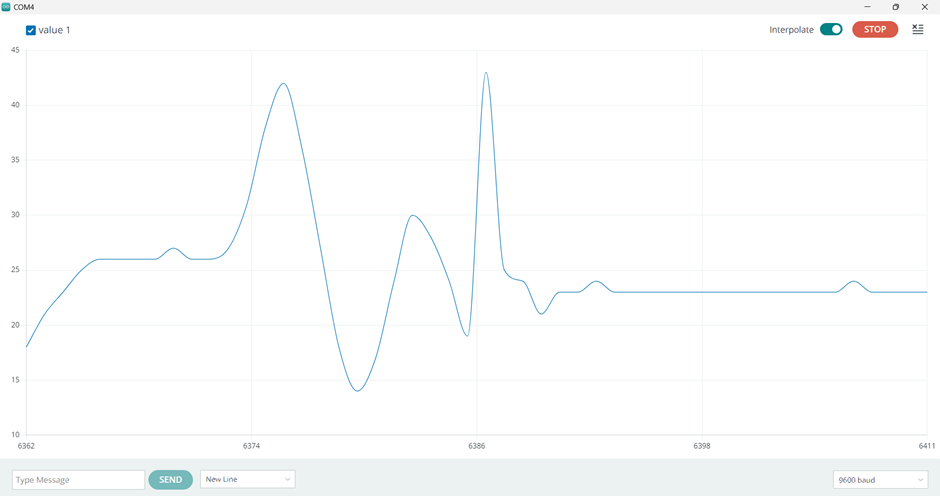

En este caso se puede observar como en la primera mitad el sistema se encuentra en unas oscilaciones no estables, pero al aplicarle al sistema el controlador PID se puede observar la rapidez con la que el sistema llega a la estabilidad de seguir la consigna, que es la posicion media de la barra, esto se hizo con el objetivo de mostrar la eficacia que tiene el controlador PID al momento de estabilizar la balanza.